In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import random

100명의 사람들이 동전던지기를 10회씩 하여 앞면이 나온 개수를 모은 모집단의 데이터를 만들어볼 예정이다.

여기서 10명씩 표본으로 추출하여, 모집단과 표본집단 간의 평균과 편차의 차이가 얼마나 나는지 비교해볼 생각이다.

먼저 모집단을 만들어보자

In [21]:
def 동전_던지기():
    return random.choice([0,1])

In [203]:
사람_수 = 100
동전_던지는_수 = 10

모집단 = [sum([동전_던지기() for i in range(동전_던지는_수)]) for i in range(사람_수)]

In [204]:
print('모평균: {0}'.format(np.mean(모집단)))
print('모분산: {0}'.format(np.std(모집단)))

모평균: 4.75
모분산: 1.6147755261955143


이제 표본집단을 10명으로 두고 평균과 분산을 구해보자

In [205]:
def 표본집단_index_뽑아오기(population, count):
    arr = []
    while True:
        select = random.randrange(0,len(population))
        if select in arr:
            continue
        arr.append(select)
        if len(arr) >= count:
            return arr

In [206]:
def 표본집단_데이터_가져오기(population, count):
    samples = []
    samples_index = 표본집단_index_뽑아오기(population, count)
    for sample_index in samples_index:
        samples.append(population[sample_index])
    return samples

In [207]:
samples = 표본집단_데이터_가져오기(모집단, 10)
print('표본평균: {0}'.format(np.mean(samples)))
print('표본표준편차: {0}'.format(np.std(samples)))

표본평균: 4.4
표본표준편차: 1.2


1번 표본을 가져온 것으로는 유의미한 차이를 이해하기 쉽지 않을 것 같다. 한 100번 표본을 가져온 데이터로 비교를 해보자.

In [208]:
samples_mean = []
samples_std = []
samples_std_dof = []
sample_repeat_count = 100
sample_n = 10

for _ in range(sample_repeat_count):
    samples = 표본집단_데이터_가져오기(모집단, sample_n)
    samples_mean.append(np.mean(samples))
    samples_std.append(np.std(samples))
    samples_std_dof.append(np.std(samples, ddof=1))

그래프로 그려서 비교를 해보자.

In [209]:
모집단_평균 = np.mean(모집단)
모집단_표준편차 = np.std(모집단)
모집단_평균_선 = [모집단_평균 for i in range(sample_repeat_count)]
모집단_표준편차_선 = [모집단_표준편차 for i in range(sample_repeat_count)]

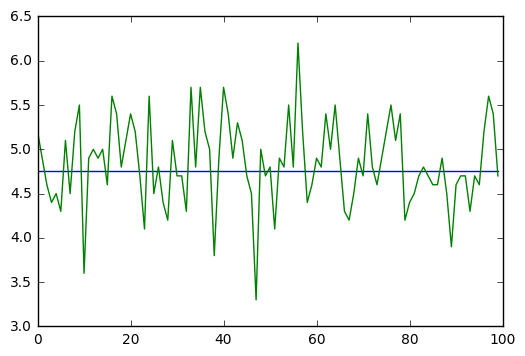

In [210]:
plt.plot(range(sample_repeat_count), 모집단_평균_선)
plt.plot(range(sample_repeat_count), samples_mean)
plt.show()

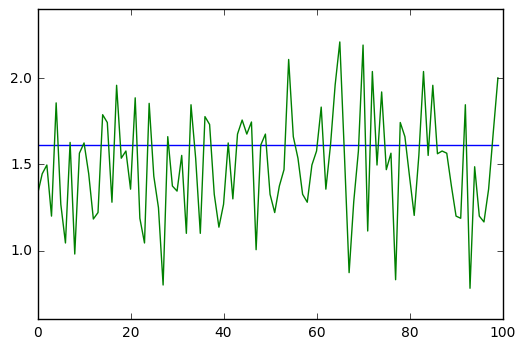

In [211]:
plt.plot(range(sample_repeat_count), 모집단_표준편차_선)
plt.plot(range(sample_repeat_count), samples_std)
plt.show()

적당히 일치해보이는데? 자유도를 적용한 뒤의 결과를 보자

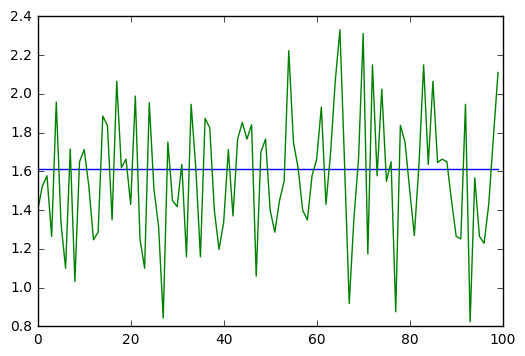

In [212]:
plt.plot(range(sample_repeat_count), 모집단_표준편차_선)
plt.plot(range(sample_repeat_count), samples_std_dof)
plt.show()

둘을 비교해볼까.

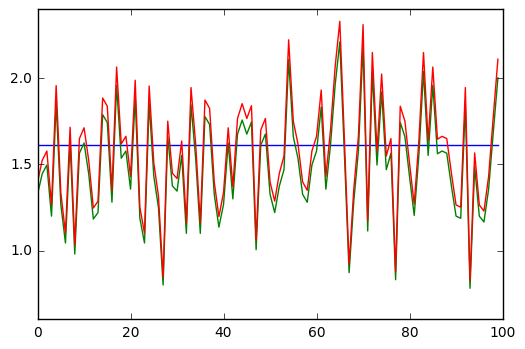

In [213]:
plt.plot(range(sample_repeat_count), 모집단_표준편차_선)
plt.plot(range(sample_repeat_count), samples_std)
plt.plot(range(sample_repeat_count), samples_std_dof)
plt.show()

자유도를 적용한 데이터가 전체적으로 수치가 조금 높다. 당연히 나눗셈을 할 때, 좀 더 적은 수로 나누었으니 크기가 커진 탓일 것이다.

자 그렇다면 질문. 자유도를 적용한 데이터와 적용하지 않은 데이터 둘 중에 어느 데이터가 모표준편차에 근접할까?

평균을 내서 비교해보자.

In [214]:
print('모표준편차: {0}'.format(모집단_표준편차))
print('자유도 적용: {0}'.format(np.mean(samples_std_dof)))
print('자유도 적용 오차: {0}'.format(모집단_표준편차-np.mean(samples_std_dof)))
print('자유도 미적용: {0}'.format(np.mean(samples_std)))
print('자유도 미적용 오차: {0}'.format(모집단_표준편차-np.mean(samples_std)))

모표준편차: 1.6147755261955143
자유도 적용: 1.5729449212999091
자유도 적용 오차: 0.041830604895605195
자유도 미적용: 1.4922265755906037
자유도 미적용 오차: 0.12254895060491067


자유도 적용한 값이 모표준편차에 근접한다는 점을 알 수 있다.

또 다른 질문. n 값이 30 이상인 경우, 자유도가 큰 의미 없다는 이야기도 있다. 정말 그럴까? n을 30으로 한번 테스트 해보자

In [215]:
samples_mean = []
samples_std = []
samples_std_dof = []
sample_repeat_count = 100
sample_n = 30

for _ in range(sample_repeat_count):
    samples = 표본집단_데이터_가져오기(모집단, sample_n)
    samples_mean.append(np.mean(samples))
    samples_std.append(np.std(samples))
    samples_std_dof.append(np.std(samples, ddof=1))
    
print('모표준편차: {0}'.format(모집단_표준편차))
print('자유도 적용: {0}'.format(np.mean(samples_std_dof)))
print('자유도 적용 평균오차: {0}'.format(모집단_표준편차-np.mean(samples_std_dof)))
print('자유도 미적용: {0}'.format(np.mean(samples_std)))
print('자유도 미적용 평균오차: {0}'.format(모집단_표준편차-np.mean(samples_std)))

모표준편차: 1.6147755261955143
자유도 적용: 1.6141416557217323
자유도 적용 평균오차: 0.00063387047378205
자유도 미적용: 1.5870112923075115
자유도 미적용 평균오차: 0.027764233888002865


자유도를 적용하나 안하나 거의 같은 같이 나왔다.

n을 50으로 비교해볼까?

In [216]:
samples_mean = []
samples_std = []
samples_std_dof = []
sample_repeat_count = 100
sample_n = 50

for _ in range(sample_repeat_count):
    samples = 표본집단_데이터_가져오기(모집단, sample_n)
    samples_mean.append(np.mean(samples))
    samples_std.append(np.std(samples))
    samples_std_dof.append(np.std(samples, ddof=1))
    
print('모표준편차: {0}'.format(모집단_표준편차))
print('자유도 적용: {0}'.format(np.mean(samples_std_dof)))
print('자유도 적용 평균오차: {0}'.format(모집단_표준편차-np.mean(samples_std_dof)))
print('자유도 미적용: {0}'.format(np.mean(samples_std)))
print('자유도 미적용 평균오차: {0}'.format(모집단_표준편차-np.mean(samples_std)))

모표준편차: 1.6147755261955143
자유도 적용: 1.623325779484007
자유도 적용 평균오차: -0.008550253288492682
자유도 미적용: 1.6070105334473113
자유도 미적용 평균오차: 0.007764992748203081


표본의 수가 증가할수록 표준편차의 오차가 줄어드는 걸 확인했다.